### The Transformer - calculation of the model

#### Multi-Head Attention Calculation

Vaswani et al.「Attention Is All You Need」  
https://papers.nips.cc/paper/7181-attention-is-all-you-need.pdf

#### 3.2.1 Scaled Dot-product Attention

$ Q \in \mathbb{R}^{d_{model}} $, $K \in \mathbb{R}^{d_{model}} $, $V \in \mathbb{R}^{d_{model}} $

$ Attention(Q,K,V) = softmax(\frac{QK^T}{\sqrt{d_k}})V $

In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
batch = 3
h = parallel = 4
dmodel = 512  # embed size
dk = dv = int(dmodel/h)  # input / output length 512/8 = 64
vocab_size = 100

input sequence X, output sequence Y

In [3]:
X = torch.LongTensor(batch, dk).random_(0, vocab_size)
X, X.shape

(tensor([[52, 19, 51, 18, 12, 94, 88, 59, 86,  8, 42,  1, 31, 66, 35, 19, 68, 59,
          53, 39, 51, 83, 85, 13, 22, 86, 41, 76, 37, 84, 52, 36, 27, 48, 65, 80,
          77, 39, 28, 75, 29, 82, 31, 76, 34, 99, 55, 89, 18, 82, 96, 84, 18, 31,
          29, 74,  9, 84, 63, 18, 19, 61, 88, 30, 13, 52, 25, 71,  1, 40, 33, 87,
          77,  0, 96, 30, 35, 53, 76, 31, 44, 90, 11, 63, 12, 62, 95, 42, 62, 79,
          11, 79, 22, 74, 11, 86, 36, 90, 20, 92, 38,  2, 38, 14, 19, 95, 66,  3,
          58, 60, 84, 58, 37, 76, 11, 62, 81, 36, 47, 97, 13,  1, 64, 93, 39, 28,
          73, 18],
         [ 8, 60, 64, 19, 52, 78, 10, 76, 39, 16, 27, 75, 89, 39, 94, 42, 45, 57,
          13, 63, 56, 14, 76, 79, 73, 92, 92, 40, 94, 50, 69, 98, 71, 36, 45, 89,
          55, 12, 70, 44, 30, 24, 11, 27, 20, 92, 54, 46, 54, 82, 96, 78, 57, 46,
          91, 33, 24, 83, 61, 60, 35, 13, 66, 77,  7, 36, 87, 30, 81,  1, 33, 44,
          42, 21, 39, 48, 49, 37, 34, 76, 50, 48, 23,  8, 16, 42, 76, 29,  1, 1

In [4]:
Y = torch.LongTensor(batch, dk).random_(0, vocab_size)
Y, Y.shape

(tensor([[31, 76, 74, 38, 74, 36, 96, 13,  2, 20, 43, 91, 52,  1, 26, 95, 80, 97,
          13, 54, 24, 69, 44, 19, 96, 43, 21, 28, 99, 67, 86, 66, 41, 89, 22, 26,
          25,  4, 24, 93, 34,  4, 49, 11, 72, 49, 42, 23, 50, 29, 42, 34, 25, 71,
          28,  9, 49, 16, 58, 10, 79, 44, 55, 27,  6, 32,  2, 71, 23, 89, 81, 41,
          63, 32, 57, 63,  3, 51, 22, 72, 42, 46, 78, 91, 17, 96, 28, 88, 96, 70,
          23, 88, 12, 21, 24, 40, 53, 91, 34, 64, 86, 43, 74, 82, 18, 96, 81, 50,
          42, 41, 35, 83, 32, 40,  1, 41, 15, 54, 91, 79, 66, 40, 30, 95, 78, 45,
           5,  7],
         [67, 48, 62, 46, 75, 60, 22,  8, 86,  2, 45, 38, 24, 58, 54, 83, 68, 86,
          62, 52, 31, 14, 25, 98, 11, 83, 25, 77, 19, 60, 19, 43, 83, 13, 32, 60,
           3,  8, 16, 64,  0, 34, 43, 99, 55,  2, 74, 24, 66, 55, 69, 12, 65, 52,
          83, 42, 25, 37, 59, 69, 98, 91, 19, 36, 45, 79, 84,  3, 70, 87, 15, 71,
          84, 36, 56, 38, 87, 32, 30, 61, 80,  4, 17, 86, 79, 62, 54, 71, 38, 1

Encoding with Embedding

In [5]:
emb = torch.nn.Embedding(vocab_size, dmodel)
emb

Embedding(100, 512)

In [6]:
xemb = emb(X)
xemb, xemb.shape

(tensor([[[-7.4370e-01, -8.6828e-01, -2.7522e-01,  ..., -7.8426e-01,
           -1.3936e+00,  1.4515e-01],
          [-1.4412e+00,  1.9428e+00, -1.5166e+00,  ...,  1.3360e+00,
            5.1782e-01, -1.2139e+00],
          [-7.7322e-01, -2.6234e+00, -1.5852e+00,  ...,  4.6360e-01,
           -4.4293e-01, -5.3810e-01],
          ...,
          [-5.1910e-01,  1.0897e+00, -7.0683e-01,  ..., -8.3104e-01,
            1.2882e+00, -3.6563e-01],
          [ 3.7988e-01,  5.4167e-01, -8.0554e-01,  ...,  2.5563e-01,
           -5.3713e-01, -4.3964e-01],
          [-1.5777e-01,  8.2214e-01,  1.2952e-01,  ..., -1.5627e+00,
            4.3985e-01,  6.8549e-01]],
 
         [[ 1.1993e+00,  2.5093e+00, -6.5730e-01,  ...,  1.9132e-03,
            5.5134e-01, -2.7710e-01],
          [-5.1832e-01,  1.9028e-02,  3.3457e-01,  ..., -1.7653e-01,
            5.3313e-01, -2.0941e-01],
          [-1.1659e-01, -6.8319e-01,  3.2398e-01,  ..., -2.9641e-01,
            8.9099e-01, -8.6332e-01],
          ...,
    

In [7]:
assert xemb.shape == (batch, dk, dmodel)

In [8]:
# should be (m, dmodel)
yemb = emb(Y)
yemb, yemb.shape

(tensor([[[-2.7923,  1.3359,  0.5676,  ...,  1.0117, -0.3725,  0.0627],
          [ 0.3541,  0.1106, -0.5027,  ..., -0.4753,  0.2624, -1.4835],
          [-0.6584, -1.0510, -0.3455,  ..., -0.1865,  0.0177,  1.0932],
          ...,
          [-0.4520,  0.5169,  0.6431,  ...,  0.6875, -0.5729,  0.0504],
          [-0.4658,  0.7954, -0.9577,  ..., -1.0081, -0.0848, -1.2925],
          [ 2.2046, -1.5829,  0.2253,  ...,  0.9616,  1.7996,  1.3005]],
 
         [[ 0.0375, -0.9582,  1.0211,  ...,  0.5692, -0.3050, -1.3306],
          [-0.6164,  0.0554, -1.2013,  ...,  0.4392, -0.5000, -0.1772],
          [ 0.5268,  1.8576, -0.4416,  ...,  0.5141,  0.8941,  0.2494],
          ...,
          [ 0.4703, -0.2740,  0.8768,  ..., -0.9074, -0.9619, -0.7564],
          [ 1.7020, -0.2659, -0.8205,  ..., -1.2084, -1.0628, -1.4550],
          [ 0.2364,  1.2207,  0.9366,  ..., -0.3527,  0.2722, -1.5333]],
 
         [[-0.7732, -2.6234, -1.5852,  ...,  0.4636, -0.4429, -0.5381],
          [ 0.3248,  0.1294,

In [9]:
assert yemb.shape == (batch, dk, dmodel)

In [10]:
K = xemb  # keys
Q = xemb  # queries
V = xemb  # values
Q.shape, K.shape, V.shape

(torch.Size([3, 128, 512]),
 torch.Size([3, 128, 512]),
 torch.Size([3, 128, 512]))

In [11]:
assert K.shape == (batch, dk, dmodel)
assert Q.shape == (batch, dk, dmodel)
assert V.shape == (batch, dk, dmodel)

In [12]:
torch.transpose(K, 1, 2).shape

torch.Size([3, 512, 128])

In [13]:
%time
# cf. https://github.com/pytorch/pytorch/issues/889 bmm is slow?
# The attention score is calculated by taking the dot product of the query vector with the key vector of the respective word we're scoring.
QK = torch.bmm(Q, torch.transpose(K, 1, 2))
QK, QK.shape

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


(tensor([[[ 5.6545e+02, -1.5040e+01, -3.0668e+01,  ..., -1.5941e+01,
            3.6291e+01, -1.4979e+01],
          [-1.5040e+01,  5.4772e+02,  3.6334e+01,  ..., -4.4557e+01,
            3.9309e+01,  2.4697e+01],
          [-3.0668e+01,  3.6334e+01,  5.4751e+02,  ..., -6.9161e+00,
           -1.1353e+01, -1.7594e+01],
          ...,
          [-1.5941e+01, -4.4556e+01, -6.9161e+00,  ...,  5.2700e+02,
           -9.3915e+00,  2.0594e+01],
          [ 3.6291e+01,  3.9309e+01, -1.1353e+01,  ..., -9.3915e+00,
            4.8655e+02,  3.7267e+00],
          [-1.4979e+01,  2.4697e+01, -1.7594e+01,  ...,  2.0594e+01,
            3.7267e+00,  5.1442e+02]],
 
         [[ 4.6766e+02, -2.7014e+01, -7.0086e+00,  ..., -1.1512e+01,
           -1.1512e+01, -2.7014e+01],
          [-2.7014e+01,  5.2237e+02, -5.2728e+00,  ..., -2.6629e+01,
           -2.6629e+01,  5.2237e+02],
          [-7.0086e+00, -5.2728e+00,  5.4679e+02,  ...,  1.4173e+01,
            1.4173e+01, -5.2728e+00],
          ...,
    

In [14]:
assert QK.shape == (batch, dv, dk)

In [15]:
scale_factor = 1 / math.sqrt(dk)
scale_factor

0.08838834764831843

In [16]:
QK*scale_factor

tensor([[[ 4.9980e+01, -1.3293e+00, -2.7107e+00,  ..., -1.4090e+00,
           3.2077e+00, -1.3240e+00],
         [-1.3293e+00,  4.8412e+01,  3.2115e+00,  ..., -3.9383e+00,
           3.4744e+00,  2.1829e+00],
         [-2.7107e+00,  3.2115e+00,  4.8394e+01,  ..., -6.1131e-01,
          -1.0035e+00, -1.5551e+00],
         ...,
         [-1.4090e+00, -3.9383e+00, -6.1131e-01,  ...,  4.6581e+01,
          -8.3010e-01,  1.8202e+00],
         [ 3.2077e+00,  3.4744e+00, -1.0035e+00,  ..., -8.3010e-01,
           4.3006e+01,  3.2940e-01],
         [-1.3240e+00,  2.1829e+00, -1.5551e+00,  ...,  1.8202e+00,
           3.2940e-01,  4.5469e+01]],

        [[ 4.1336e+01, -2.3877e+00, -6.1948e-01,  ..., -1.0176e+00,
          -1.0176e+00, -2.3877e+00],
         [-2.3877e+00,  4.6172e+01, -4.6605e-01,  ..., -2.3537e+00,
          -2.3537e+00,  4.6172e+01],
         [-6.1948e-01, -4.6605e-01,  4.8330e+01,  ...,  1.2527e+00,
           1.2527e+00, -4.6606e-01],
         ...,
         [-1.0176e+00, -2

In [17]:
softmax = torch.nn.Softmax()

In [18]:
attention_weight = softmax(QK*scale_factor)
attention_weight, attention_weight.shape

/anaconda3/envs/core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


(tensor([[[9.9924e-01, 4.6939e-02, 6.0847e-03,  ..., 2.7347e-01,
           9.7161e-01, 6.6251e-01],
          [4.6939e-02, 8.7667e-01, 9.4643e-01,  ..., 2.5484e-02,
           9.6672e-01, 7.8700e-20],
          [6.0847e-03, 9.4643e-01, 5.1299e-01,  ..., 8.9682e-02,
           9.4580e-02, 2.4797e-01],
          ...,
          [2.7347e-01, 2.5484e-02, 8.9682e-02,  ..., 9.0294e-01,
           7.6435e-20, 6.2219e-01],
          [9.7161e-01, 9.6672e-01, 9.4580e-02,  ..., 7.6435e-20,
           3.1137e-01, 8.9643e-01],
          [6.6251e-01, 7.8700e-20, 2.4797e-01,  ..., 6.2219e-01,
           8.9643e-01, 3.1534e-01]],
 
         [[1.7610e-04, 1.6289e-02, 4.9252e-02,  ..., 4.0447e-01,
           1.4206e-02, 2.2868e-01],
          [1.6289e-02, 9.3278e-02, 2.3930e-02,  ..., 1.2430e-01,
           2.8457e-03, 1.0000e+00],
          [4.9252e-02, 2.3930e-02, 4.8125e-01,  ..., 5.7842e-01,
           9.0293e-01, 7.3680e-01],
          ...,
          [4.0447e-01, 1.2430e-01, 5.7842e-01,  ..., 3.034

In [19]:
attention_out = torch.bmm(attention_weight, V)
attention_out, attention_out.shape

(tensor([[[ -5.2208,   6.3396,  -1.3444,  ..., -11.1527,  -2.0041,  -0.8382],
          [-12.1644,  16.1637,  -8.5687,  ...,  -0.2904,   7.8781,  -8.8301],
          [-14.0533,   7.7594, -12.5574,  ...,   2.9489,   0.1275,   0.1876],
          ...,
          [ -2.9353,   9.9205,   2.9277,  ..., -19.9918,   2.4707,  -2.9385],
          [  0.7752,  12.1051,  -7.3978,  ...,  -3.7475,  -3.1378,  -9.5008],
          [ -0.6660,  19.6250,   1.0155,  ...,  -9.3714,  13.4782, -10.3719]],
 
         [[  6.7824,   6.4249,  -3.8334,  ...,  -6.1943,   8.4589,  -4.8254],
          [ -1.6051,  -5.7161,   6.1422,  ...,  -1.7075,  -2.2090,   1.0344],
          [  0.6884,   3.2505,   3.5361,  ...,  -5.5932,   0.3041,  -5.3775],
          ...,
          [  5.0672,   1.6973,  -0.6583,  ...,  -4.8749,  -2.4965,  -0.2467],
          [  7.7942,  -0.6047,  -2.3646,  ...,  -3.8502,  -0.0719,  -1.8307],
          [  3.1276,  -8.1946,   3.6876,  ...,  -4.8892,  -5.6631,  -1.9023]],
 
         [[ 14.2264,  -8.222

In [20]:
assert attention_out.shape == (batch, dv, dmodel)

In [21]:
def embedding(X, vocab_x, embed_size_x):
    """
    params:
        - X (batch, inlen(=dk))  # input sequence
        - vocab_x : int  # vocab size of input
        - embed_size_x : embedding size of input
        
    returns:
        - K (batch, dk(=inlen), dmodel)
        - Q (batch, dk(=inlen), dmodel)
        - V (batch, dk(=inlen), dmodel)
    """
    print(f'input sequence X : {X.shape} (batchsize, seqlen)')
    print(f'embedding for input sequence : vocab size {vocab_x} embed(=hidden) size {embed_size_x}')
    embedding_x = torch.nn.Embedding(vocab_x, embed_size_x)
    Xemb = embedding_x(X)
    K = Xemb
    Q = Xemb.clone()
    V = Xemb.clone()
    print(f'encoded input sequence X:{X.shape} to K:{K.shape}, V:{V.shape}')
    return K, Q, V

In [22]:
def projection(K, Q, V):
    """
    params:
        - K (batch, dk(=inlen), dmodel)
        - Q (batch, dk(=inlen), dmodel)
        - V (batch, dv(=outlen), dmodel)
        - dk (inlen)
        - dv (labellen)
        - dmodel (hidden size)
    returns:
        - QW (batch, dmodel, dmodel)
        - KW (batch, dmodel, dmodel)
        - VW (batch, dmodel, dmodel)
    """
    dk = K.shape[1]
    dv = V.shape[1]
    dmodel = K.shape[2]
    Wq = torch.nn.Linear(dk, dmodel)
    Wk = torch.nn.Linear(dk, dmodel)
    Wv = torch.nn.Linear(dv, dmodel)
    
    QW = Wq(Q.transpose(1,2))
    KW = Wk(K.transpose(1,2))
    VW = Wv(V.transpose(1,2))
    
    print(f'project K({K.shape}), Q({Q.shape}), V({V.shape}) -> KW({KW.shape}), QW({QW.shape}), VW({VW.shape})')
    return QW, KW, VW 

In [23]:
def calc_scale_factor(dk):
    scale_factor = 1 / math.sqrt(dk)
    print(f'calculate scale factor by 1 / math.sqrt({dk}) = {scale_factor}')
    return scale_factor

In [24]:
def scaled_dot_product_attention(KW, QW, VW, scale_factor):
    """
    params:
        - KW (batch, dmodel, dmodel)  # Keys (eocoded inputs)
        - QW (batch, dmodel, dmodel)  # Queries (decode states)
        - VW (batch, dmodel, dmodel)  # Values (encoded inputs)
        - scale_factor (float)  # normalization scale factor
        
    returns:
        - attention_weights (batch, dv, dmodel)
    """
    print('scaled dot product attention')
    print(f'KW {KW.shape}')
    print(f'QW {QW.shape}')
    print(f'VW {VW.shape}')
    softmax = torch.nn.Softmax()
    
    # The attention score is calculated by taking the dot product of
    # the query vector with the key vector of the respective word we're scoring.
    QW_KW = torch.bmm(QW, torch.transpose(KW, 1, 2))
    attention_weight = softmax(QW_KW*scale_factor)
    attention_out = torch.bmm(attention_weight, VW)
    return attention_out

In [25]:
# test
K, Q, V = embedding(X, vocab_size, dmodel)
dk = K.shape[1]
scale_factor = calc_scale_factor(dk)
KW, QW, VW = projection(K, Q, V)
scaled_dot_product_attention(K, Q, V, scale_factor)

input sequence X : torch.Size([3, 128]) (batchsize, seqlen)
embedding for input sequence : vocab size 100 embed(=hidden) size 512
encoded input sequence X:torch.Size([3, 128]) to K:torch.Size([3, 128, 512]), V:torch.Size([3, 128, 512])
calculate scale factor by 1 / math.sqrt(128) = 0.08838834764831843
project K(torch.Size([3, 128, 512])), Q(torch.Size([3, 128, 512])), V(torch.Size([3, 128, 512])) -> KW(torch.Size([3, 512, 512])), QW(torch.Size([3, 512, 512])), VW(torch.Size([3, 512, 512]))
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])


/anaconda3/envs/core/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[[  3.8903,   6.2625,   8.4174,  ...,   7.7514,   6.2590,  -2.7957],
         [ 10.3296,  -0.2474,   6.6886,  ...,   5.4952,   7.5284,  -1.0416],
         [  3.3275,  -1.9438,  13.6787,  ...,  -6.1271,   8.0654,  -4.7233],
         ...,
         [ 10.5212,   0.6812,   0.1991,  ...,   3.4666,   4.0624,   3.4267],
         [  4.6929,   3.0002,   4.7426,  ...,   4.6379,  14.5788,  -5.5305],
         [  3.6568,   2.8296,  12.1129,  ...,  -0.1851,   8.6264,  -7.7235]],

        [[-10.1946,  -0.1708,   7.7343,  ...,  -7.1773,   4.3770,  -0.9312],
         [ -3.7826,  -6.1612,   1.5804,  ..., -12.5603,   1.9346,  -1.6255],
         [ -3.9393,  -0.6570,   9.5522,  ...,  -8.4486,   0.5684,  -0.2595],
         ...,
         [ -4.0282,  -4.0225,   1.2732,  ..., -12.4916,   3.9984,  -8.2403],
         [ -3.3371,  -1.5900,   2.3007,  ..., -11.6249,   5.4169,  -8.8317],
         [ -1.8625,  -0.3722,   2.1419,  ...,  -8.2056,  -0.3253,  -3.0446]],

        [[  6.2761,   1.7240,  10.0897,  ...

#### 3.2.2 Multi-Head Attention

$ Q \in \mathbb{R}^{d_{model}} $, $K \in \mathbb{R}^{d_{model}} $, $V \in \mathbb{R}^{d_{model}} $

$ Attention(Q,K,V) = softmax(\frac{QK^T}{\sqrt{d_k}})V $

$ MultiHead(Q,K,V) = Concat(head_1,...,head_h)W^O $  
$ where $  
$ head_i = Attention(QW_i^Q,KW_i^K,VW_i^V) $

$ W_i^Q \in \mathbb{R}^{d_{model} \times d_k} $, $W_i^K \in \mathbb{R}^{d_{model} \times d_k} $, $W_i^V \in \mathbb{R}^{d_{model} \times d_v} $ and $ W^O \in \mathbb{R}^{{hd_v} \times d_{model}} $

In [26]:
Wq = torch.nn.Linear(dk, dmodel)
Wk = torch.nn.Linear(dk, dmodel)
Wv = torch.nn.Linear(dk, dmodel)
Wq, Wk, Wv

(Linear(in_features=128, out_features=512, bias=True),
 Linear(in_features=128, out_features=512, bias=True),
 Linear(in_features=128, out_features=512, bias=True))

In [27]:
assert K.shape == (batch, dk, dmodel)
assert Q.shape == (batch, dk, dmodel)
assert V.shape == (batch, dk, dmodel)

In [28]:
QW = Wq(Q.transpose(1,2))
KW = Wk(K.transpose(1,2))
VW = Wv(V.transpose(1,2))
QW.shape, KW.shape, VW.shape

(torch.Size([3, 512, 512]),
 torch.Size([3, 512, 512]),
 torch.Size([3, 512, 512]))

In [29]:
assert KW.shape == (batch, dmodel, dmodel)
assert QW.shape == (batch, dmodel, dmodel)
assert VW.shape == (batch, dmodel, dmodel)

In [30]:
def multi_head_attention(KW, QW, VW, h, scale_factor):
    """
    params:
        - KW (batch, dmodel, dmodel)  # Keys (eocoded inputs)
        - QW (batch, dmodel, dmodel)  # Queries (decode states)
        - VW (batch, dmodel, dmodel)  # Values (encoded inputs)
        - h (n parallel)
    """
    dmodel = KW.shape[2]  # embed size
    step = int(dmodel/h)
    Wo = torch.nn.Linear(dmodel, dmodel)
    print(f'QW {QW.shape}')
    print(f'n parallel {h}')
    print(f'total_size/n_parallel {step}')
    print(f'QWi {QW[:, 1*step:1*step+step, :].shape}')
    print(f'KWi {KW[:, 1*step:1*step+step, :].shape}')
    print(f'VWi {VW[:, 1*step:1*step+step, :].shape}')
    print(f'trying to culculate dot product attention for {h} heads. scale factor is {scale_factor}.')
    heads = [scaled_dot_product_attention(
        QW[:, i*step:(i+1)*step, :], KW[:, i*step:(i+1)*step, :], VW[:, i*step:(i+1)*step, :], scale_factor) for i in range(h)]
    print(f'{len(heads)} heads {heads} as each shape {heads[0].shape}')
    out = Wo(torch.cat(heads, dim=1).transpose(1,2))
    print(f'product of Wo and heads out {out} as the shape {out.shape}')
    return out, KW

In [31]:
QW, KW, VW = projection(K, Q, V)
attention, KW = multi_head_attention(KW, QW, VW, h, scale_factor)

/anaconda3/envs/core/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


project K(torch.Size([3, 128, 512])), Q(torch.Size([3, 128, 512])), V(torch.Size([3, 128, 512])) -> KW(torch.Size([3, 512, 512])), QW(torch.Size([3, 512, 512])), VW(torch.Size([3, 512, 512]))
QW torch.Size([3, 512, 512])
n parallel 4
total_size/n_parallel 128
QWi torch.Size([3, 128, 512])
KWi torch.Size([3, 128, 512])
VWi torch.Size([3, 128, 512])
trying to culculate dot product attention for 4 heads. scale factor is 0.08838834764831843.
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
4 heads [tensor([[[ 1.1162,  2.3917,  3.1834,  ...,  3.0642,  2.1254,  4.8349],
         [ 1.2

In [32]:
K_V = torch.cat([K, V], dim=1)
K_V, K_V.shape

(tensor([[[-0.8309,  0.8188,  0.1869,  ...,  1.4639, -1.3782, -0.0394],
          [ 0.8094, -0.5854,  0.0703,  ..., -0.4338, -0.6799,  3.0538],
          [ 0.9200, -0.8787, -0.1304,  ..., -0.9378,  0.8689, -0.2249],
          ...,
          [-0.7455, -0.9047,  1.1630,  ...,  1.0632,  0.0449,  0.2220],
          [ 0.0277,  0.0853,  0.8087,  ...,  0.0273, -0.5969,  1.5023],
          [ 0.3160, -0.3843,  0.6898,  ..., -0.5718,  0.0507, -1.4805]],
 
         [[-1.1273, -1.2643,  2.4867,  ...,  0.7259,  0.6021,  1.6078],
          [ 1.5451, -0.0376,  0.0814,  ..., -0.0448,  1.7424, -0.9346],
          [ 1.2387,  0.1706,  2.4711,  ...,  0.9402,  0.8276,  0.9205],
          ...,
          [-0.1403,  0.9230,  1.9375,  ...,  0.5001, -0.3076, -1.1720],
          [-0.1403,  0.9230,  1.9375,  ...,  0.5001, -0.3076, -1.1720],
          [ 1.5451, -0.0376,  0.0814,  ..., -0.0448,  1.7424, -0.9346]],
 
         [[ 0.0273, -1.0413, -0.9564,  ...,  0.4540, -0.9405,  1.7631],
          [-0.1271, -1.1015,

Residual 1

In [33]:
resout = attention + KW
resout, resout.shape

(tensor([[[ 2.7903, -0.5768, -3.4912,  ...,  3.8912,  2.6864,  0.9129],
          [-0.5389, -1.8683, -0.1777,  ..., -0.2810,  0.0689,  1.8588],
          [ 1.4425,  3.9677,  1.7216,  ..., -4.0405,  0.5161, -1.7574],
          ...,
          [ 0.5261,  0.2725,  0.3553,  ...,  1.1955,  0.0947, -0.0403],
          [ 0.4477,  1.9714,  0.6206,  ..., -1.4751, -0.2165, -2.2941],
          [-0.4186, -4.1258, -6.2234,  ...,  4.5531,  3.5777,  0.9043]],
 
         [[ 1.7743, -2.5963, -2.6039,  ...,  3.4203, -1.3798, -0.4755],
          [-1.7295, -1.0272, -2.7859,  ..., -2.1213,  0.7021, -1.6261],
          [ 1.9148,  2.4852,  1.8261,  ...,  1.9590,  1.6403,  0.0133],
          ...,
          [ 2.2865, -1.6690, -1.7723,  ...,  3.0847, -1.1630,  3.1391],
          [ 2.6361,  1.2904,  0.8341,  ...,  2.1515,  0.7531,  1.7403],
          [ 1.1323, -0.2810, -2.9839,  ...,  1.0722, -0.2739, -1.6767]],
 
         [[ 6.0265, -4.4544, -8.3523,  ...,  4.4660,  3.5781,  0.1616],
          [-0.4338, -1.8842,

Normalize 1

https://pytorch.org/docs/stable/nn.html#torch.nn.LayerNorm

In [34]:
norm1 = torch.nn.LayerNorm(normalized_shape=dmodel)  # only for the last dim or [dmodel, dmodel] for the last 2 dims
norm1

LayerNorm(torch.Size([512]), eps=1e-05, elementwise_affine=True)

In [35]:
norm1out = norm1(resout.transpose(1, 0)).transpose(0, 1)  # BatchNorm Input: (N, C, L) Output: (N, C, L)
norm1out, norm1out.shape

(tensor([[[ 1.0539, -0.1882, -1.2632,  ...,  1.4600,  1.0156,  0.3614],
          [-0.4201, -1.2955, -0.1823,  ..., -0.2503, -0.0199,  1.1587],
          [ 0.7277,  2.0468,  0.8735,  ..., -2.1363,  0.2438, -0.9437],
          ...,
          [ 0.2568,  0.1194,  0.1643,  ...,  0.6195,  0.0231, -0.0501],
          [ 0.3181,  1.2356,  0.4222,  ..., -0.8398, -0.0819, -1.3330],
          [-0.1196, -1.2628, -1.9096,  ...,  1.4135,  1.1127,  0.2883]],
 
         [[ 0.8734, -1.3490, -1.3528,  ...,  1.7104, -0.7304, -0.2706],
          [-0.7962, -0.4750, -1.2794,  ..., -0.9755,  0.3160, -0.7489],
          [ 1.3141,  1.6899,  1.2556,  ...,  1.3432,  1.1332,  0.0612],
          ...,
          [ 1.0824, -0.7493, -0.7971,  ...,  1.4521, -0.5150,  1.4773],
          [ 1.8031,  0.8672,  0.5499,  ...,  1.4661,  0.4935,  1.1801],
          [ 0.5438, -0.0960, -1.3194,  ...,  0.5166, -0.0927, -0.7277]],
 
         [[ 1.9571, -1.4384, -2.7012,  ...,  1.4515,  1.1639,  0.0570],
          [-0.2279, -1.1706,

Feed Forward

In [36]:
feedforward = torch.nn.Linear(in_features=dmodel, out_features=dmodel)
feedforward

Linear(in_features=512, out_features=512, bias=True)

In [37]:
ffout = feedforward(norm1out)
ffout, ffout.shape

(tensor([[[ 1.1402e+00, -7.6056e-01, -7.1835e-01,  ..., -1.0897e+00,
            1.8222e-01, -2.4935e-01],
          [-6.3958e-01,  8.3822e-01, -7.4439e-01,  ...,  2.9044e-01,
            2.4172e-01,  5.5284e-02],
          [ 6.9019e-02, -8.2964e-02,  1.7937e+00,  ..., -1.0105e-01,
            4.0699e-01,  5.7013e-01],
          ...,
          [ 5.0293e-01,  5.4457e-01, -2.1001e-01,  ...,  1.6491e-02,
           -1.3682e-01,  6.3406e-01],
          [-2.6808e-01,  4.6463e-01,  1.0714e+00,  ..., -6.2425e-02,
           -5.3462e-01, -4.6472e-03],
          [ 1.0792e-01,  1.0046e+00, -4.2522e-01,  ...,  6.8127e-01,
            1.3642e-01,  2.4834e-01]],
 
         [[ 5.1703e-01,  4.8112e-01,  1.3112e-01,  ..., -4.8302e-01,
           -2.9632e-01,  1.3697e-01],
          [ 5.6267e-02,  9.5840e-02,  4.5286e-01,  ...,  4.1746e-01,
            5.4327e-01,  2.1566e-01],
          [-7.5482e-02,  8.8496e-01,  2.0172e-01,  ..., -9.6082e-02,
            1.8461e-01,  8.8107e-02],
          ...,
    

Residual 2

In [38]:
ffresout = resout + ffout
ffresout, ffresout.shape

(tensor([[[ 3.9306, -1.3374, -4.2095,  ...,  2.8015,  2.8687,  0.6635],
          [-1.1785, -1.0300, -0.9220,  ...,  0.0094,  0.3106,  1.9141],
          [ 1.5115,  3.8848,  3.5153,  ..., -4.1415,  0.9231, -1.1873],
          ...,
          [ 1.0290,  0.8171,  0.1453,  ...,  1.2120, -0.0422,  0.5937],
          [ 0.1797,  2.4360,  1.6920,  ..., -1.5375, -0.7511, -2.2987],
          [-0.3107, -3.1212, -6.6486,  ...,  5.2343,  3.7141,  1.1526]],
 
         [[ 2.2913, -2.1152, -2.4728,  ...,  2.9373, -1.6762, -0.3385],
          [-1.6732, -0.9314, -2.3330,  ..., -1.7038,  1.2454, -1.4104],
          [ 1.8394,  3.3701,  2.0278,  ...,  1.8630,  1.8249,  0.1015],
          ...,
          [ 3.3003, -2.4083, -2.1708,  ...,  2.2165, -1.3332,  2.9645],
          [ 2.3722,  0.9951, -0.1175,  ...,  1.8173,  0.9053,  2.3952],
          [ 1.8843, -0.7872, -2.9714,  ...,  0.2083, -0.8002, -1.9697]],
 
         [[ 7.1088, -4.1589, -8.7051,  ...,  4.0402,  3.7274,  0.3481],
          [-1.4010, -2.9365,

Normalize 2

In [39]:
norm2 = torch.nn.LayerNorm(normalized_shape=dmodel)
norm2

LayerNorm(torch.Size([512]), eps=1e-05, elementwise_affine=True)

In [40]:
norm2out = norm2(ffresout.transpose(0, 1)).transpose(0, 1)
norm2out, norm2out.shape

(tensor([[[ 1.4174, -0.4490, -1.4666,  ...,  1.0173,  1.0411,  0.2599],
          [-0.8251, -0.7327, -0.6656,  ..., -0.0862,  0.1012,  1.0985],
          [ 0.7506,  1.9548,  1.7673,  ..., -2.1175,  0.4521, -0.6187],
          ...,
          [ 0.4894,  0.3791,  0.0292,  ...,  0.5848, -0.0685,  0.2627],
          [ 0.1618,  1.4356,  1.0156,  ..., -0.8075, -0.3636, -1.2373],
          [-0.0994, -0.9614, -2.0433,  ...,  1.6014,  1.1351,  0.3495]],
 
         [[ 1.0921, -1.0882, -1.2651,  ...,  1.4117, -0.8710, -0.2091],
          [-0.7676, -0.4375, -1.0613,  ..., -0.7813,  0.5312, -0.6507],
          [ 1.2041,  2.1526,  1.3209,  ...,  1.2187,  1.1951,  0.1272],
          ...,
          [ 1.5061, -1.0608, -0.9540,  ...,  1.0188, -0.5773,  1.3551],
          [ 1.5168,  0.6288, -0.0886,  ...,  1.1590,  0.5709,  1.5316],
          [ 0.8644, -0.3117, -1.2732,  ...,  0.1266, -0.3174, -0.8322]],
 
         [[ 2.2625, -1.3427, -2.7973,  ...,  1.2807,  1.1806,  0.0994],
          [-0.8056, -1.7502,

#### Encoder (MultiHead Attention + Norm + FeedForward + Norm)

In [41]:
def encoder(K, Q, V, h):
    """
    params:
        - K (batch, inlen(=dk), dmodel)  # Keys (eocoded inputs)
        - Q (batch, outlen(=dk), dmodel)  # Queries (decode states)
        - V (batch, inlen(=dk), dmodel)  # Values (encoded inputs)
        - h (n parallel)
    """
    
    batch_size = K.shape[0]
    dk = K.shape[1]
    print(f'batch size {batch_size}')
    
    norm1 = torch.nn.BatchNorm1d(num_features=batch_size)
    feedforward = torch.nn.Linear(in_features=dmodel, out_features=dmodel)
    norm2 = torch.nn.BatchNorm1d(num_features=batch_size)
    
    # project K, Q, V -> KW, QW, VW
    KW, QW, VW = projection(K, Q, V)
    
    # calculate scale factor
    scale_factor = calc_scale_factor(dk)
    
    print(f'multi head attention')
    attention, KW = multi_head_attention(KW, QW, VW, h, scale_factor)
    
    print(f'res 1 [attention out + KW]')
    resout = attention + KW
    print(f'res 1 out shape {resout.shape}')
    
    print(f'norm 1')
    norm1out = norm1(resout.transpose(1, 0)).transpose(0, 1) 
    print(f'norm 1 out shape {norm1out.shape}')
    
    print(f'feedforward')
    ffout = feedforward(norm1out)
    print(f'res 2 [feedforward out + norm 1 out]')
    ffresout = attention + ffout
    print(f'res 2 out shape {ffresout.shape}')
    
    print(f'norm 2')
    norm2out = norm2(ffresout.transpose(0, 1)).transpose(0, 1)
    print(f'norm 2 out shape {norm2out.shape}')
    
    out = norm2out
    print(f'encoder out shape {out.shape}')
    
    return out

In [42]:
encout = encoder(K, Q, V, h)

batch size 3
project K(torch.Size([3, 128, 512])), Q(torch.Size([3, 128, 512])), V(torch.Size([3, 128, 512])) -> KW(torch.Size([3, 512, 512])), QW(torch.Size([3, 512, 512])), VW(torch.Size([3, 512, 512]))
calculate scale factor by 1 / math.sqrt(128) = 0.08838834764831843
multi head attention


/anaconda3/envs/core/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


QW torch.Size([3, 512, 512])
n parallel 4
total_size/n_parallel 128
QWi torch.Size([3, 128, 512])
KWi torch.Size([3, 128, 512])
VWi torch.Size([3, 128, 512])
trying to culculate dot product attention for 4 heads. scale factor is 0.08838834764831843.
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
4 heads [tensor([[[ 2.0305, -0.6555, -0.9424,  ..., -0.3195, -0.1145, -2.1183],
         [ 1.0672,  1.4086,  1.3938,  ..., -1.3047, -0.1693, -1.4427],
         [-0.6447,  0.2568,  0.9310,  ..., -2.8648, -0.4532, -0.6200],
         ...,
         [-0.5578, -1.1043,  1.8605,  ...,  0.3534

In [43]:
encout, encout.shape

(tensor([[[ 7.0110e-02, -9.6474e-02,  1.3684e-01,  ..., -2.7241e-01,
            3.4175e-01,  2.1745e-02],
          [-9.5351e-03, -6.9557e-02,  1.8698e-01,  ...,  1.9591e-01,
           -2.4030e-01,  2.9084e-01],
          [-1.8618e-01, -3.1237e-01,  2.5253e-01,  ..., -2.2639e-01,
            4.6771e-01, -2.2265e-01],
          ...,
          [-3.6277e-02,  1.4247e-01, -6.0433e-02,  ...,  3.3248e-01,
            6.1827e-02,  1.7578e-01],
          [-4.5946e-01, -3.3543e-02, -7.3581e-02,  ..., -3.7136e-03,
            3.0895e-01, -3.3620e-01],
          [ 2.9586e-01,  1.1716e-01, -1.9573e-01,  ...,  1.2259e-01,
           -1.6445e-01,  1.1471e-01]],
 
         [[-3.4758e-01, -4.4772e-01, -1.1454e+00,  ..., -6.0366e-01,
            2.3221e-01,  1.6448e-01],
          [-1.1839e+00,  6.5257e-05, -1.1130e-01,  ...,  1.1822e+00,
           -8.3410e-01,  5.3705e-01],
          [-8.3367e-01, -9.6653e-01,  1.4459e-01,  ..., -1.1231e-01,
           -6.1574e-01,  2.8738e-01],
          ...,
    

#### Positional Encoding

https://datascience.stackexchange.com/questions/51065/what-is-the-positional-encoding-in-the-transformer-model/51225#51225

For example, for word $ w $ at position $ pos \in [0, L-1] $ in the input sequence $ \boldsymbol{w}=(w_0,\cdots, w_{L-1}) $

$ \begin{align*}e_{w}' &= e_{w} + \left[sin\left(\frac{pos}{10000^{0}}\right), cos\left(\frac{pos}{10000^{0}}\right),sin\left(\frac{pos}{10000^{2/4}}\right),cos\left(\frac{pos}{10000^{2/4}}\right)\right]\\
&=e_{w} + \left[sin\left(pos\right), cos\left(pos\right),sin\left(\frac{pos}{100}\right),cos\left(\frac{pos}{100}\right)\right]\\
\end{align*} $

$ \text{PE}(pos,2i)=sin\left(\frac{pos}{10000^{2i/d_{model}}}\right), $  
$ \text{PE}(pos,2i+1)=cos\left(\frac{pos}{10000^{2i/d_{model}}}\right).$


with $ d_{model}=512 $ (thus $ i \in [0, 255] $)

In [44]:
_dmodel = 4
i = 1
pos = 1
print(10000**((2*i)/_dmodel))
print(pos/(10000**((2*i)/_dmodel)))
print(math.sin(pos/(10000**((2*i)/_dmodel))))

100.0
0.01
0.009999833334166664


In [45]:
def PE(pos, i, dmodel=512):
    """
    
    args:
        - pos (int)  # pos in [0, L-1] in input sequence w = (w0,...,wL-1)
        - i (int) # with dmodel = 512, i in [0, 255]
    """
    if i % 2 == 0:
        # PE(pos,2i) = sin(pos/10000^{2i/dmodel})
        return math.sin(pos/(10000**((2*i)/dmodel)))
    else:
        # PE(pos,2i+1) = cos(pos/10000^{2i/dmodel})
        return math.cos(pos/(10000**((2*i)/dmodel)))

In [46]:
PE(1, 1, 4)

0.9999500004166653

In [47]:
[print(f'{pos} {i} {PE(pos, i)}') for pos, i in zip(range(dk), range(_dmodel))]

0 0 0.0
1 1 0.5696950086931313
2 2 0.9581443762382829
3 3 -0.9010849838078472


[None, None, None, None]

In [48]:
def gen_positional_matrix(dk, dmodel=512):
    print(f'generate positional matrix (dk={dk}, dmodel={dmodel})')
    positional_matrix = torch.zeros((dk, dmodel))
    for pos in range(dk):
        # rows (=sequence length)
        for i in range(dmodel):
            # columns (=hidden size)
            positional_matrix[pos, i] = PE(pos, i, dmodel)
    return positional_matrix
positional_matrix = gen_positional_matrix(dk, dmodel) 
positional_matrix, positional_matrix.shape

generate positional matrix (dk=128, dmodel=512)


(tensor([[ 0.0000e+00,  1.0000e+00,  0.0000e+00,  ...,  1.0000e+00,
           0.0000e+00,  1.0000e+00],
         [ 8.4147e-01,  5.6969e-01,  8.0196e-01,  ...,  1.0000e+00,
           1.0746e-08,  1.0000e+00],
         [ 9.0930e-01, -3.5090e-01,  9.5814e-01,  ...,  1.0000e+00,
           2.1492e-08,  1.0000e+00],
         ...,
         [-6.1604e-01,  3.6032e-01, -8.2483e-02,  ...,  1.0000e+00,
           1.3433e-06,  1.0000e+00],
         [ 3.2999e-01, -5.6138e-01, -8.4850e-01,  ...,  1.0000e+00,
           1.3540e-06,  1.0000e+00],
         [ 9.7263e-01, -9.9995e-01, -9.3127e-01,  ...,  1.0000e+00,
           1.3648e-06,  1.0000e+00]]), torch.Size([128, 512]))

Text(0.5, 1.0, 'Heatmap of Flight Density from 1949 to 1961')

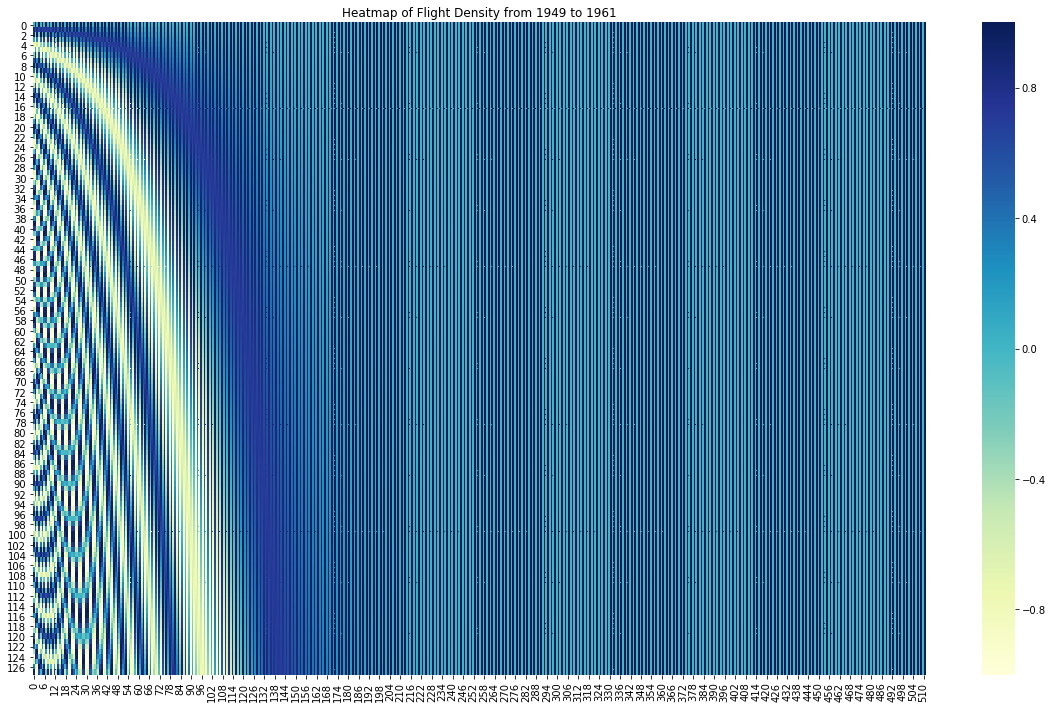

In [54]:
fig = plt.figure(figsize=(20,12))
r = sns.heatmap(positional_matrix, cmap='YlGnBu')
r.set_title("Heatmap of Flight Density from 1949 to 1961")

In [52]:
P = gen_positional_matrix(dk, dmodel)
K + P, (K + P).shape

generate positional matrix (dk=128, dmodel=512)


(tensor([[[-0.8309,  1.8188,  0.1869,  ...,  2.4639, -1.3782,  0.9606],
          [ 1.6509, -0.0157,  0.8722,  ...,  0.5662, -0.6799,  4.0538],
          [ 1.8293, -1.2296,  0.8278,  ...,  0.0622,  0.8689,  0.7751],
          ...,
          [-1.3616, -0.5444,  1.0805,  ...,  2.0632,  0.0449,  1.2220],
          [ 0.3577, -0.4760, -0.0398,  ...,  1.0273, -0.5969,  2.5023],
          [ 1.2887, -1.3843, -0.2415,  ...,  0.4282,  0.0507, -0.4805]],
 
         [[-1.1273, -0.2643,  2.4867,  ...,  1.7259,  0.6021,  2.6078],
          [ 2.3866,  0.5321,  0.8834,  ...,  0.9552,  1.7424,  0.0654],
          [ 2.1480, -0.1803,  3.4292,  ...,  1.9402,  0.8276,  1.9205],
          ...,
          [-0.7563,  1.2833,  1.8551,  ...,  1.5001, -0.3076, -0.1720],
          [ 0.1897,  0.3616,  1.0890,  ...,  1.5001, -0.3076, -0.1720],
          [ 2.5178, -1.0375, -0.8499,  ...,  0.9552,  1.7424,  0.0654]],
 
         [[ 0.0273, -0.0413, -0.9564,  ...,  1.4540, -0.9405,  2.7631],
          [ 0.7144, -0.5318,

In [55]:
def positional_encoding(K, Q, V, dk, dmodel):
    P = gen_positional_matrix(dk, dmodel)
    return K+P, Q+P, V+P

#### Masking out to prevent leftward information flow in the decoder

#### 3.2.3
Similarly, self-attention layers in the decoder allow each position in the decoder to attend to all positions in the decoder up to and including that position. We need to prevent leftward information flow in the decoder to preserve the auto-regressive property. We **implement this inside of scaled dot-product attention** by **masking out (setting to −∞) all values in the input of the softmax** which correspond to illegal connections. See Figure 2.

In [56]:
X_ = torch.arange(5)
Y_ = torch.arange(5)
X_, Y_

(tensor([0, 1, 2, 3, 4]), tensor([0, 1, 2, 3, 4]))

In [57]:
emb_ = torch.nn.Embedding(10, 10)
Xemb_ = X_.repeat(5, 1)
Yemb_ = Y_.repeat(5, 1)
Xemb_ = torch.tril(Xemb_)
QW_ = Xemb_.repeat(2, 1, 1)
KW_ = Xemb_.repeat(2, 1, 1)
QW_

tensor([[[0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0],
         [0, 1, 2, 0, 0],
         [0, 1, 2, 3, 0],
         [0, 1, 2, 3, 4]],

        [[0, 0, 0, 0, 0],
         [0, 1, 0, 0, 0],
         [0, 1, 2, 0, 0],
         [0, 1, 2, 3, 0],
         [0, 1, 2, 3, 4]]])

In [58]:
torch.bmm(QW_, torch.transpose(KW_, 1, 2))

tensor([[[ 0,  0,  0,  0,  0],
         [ 0,  1,  1,  1,  1],
         [ 0,  1,  5,  5,  5],
         [ 0,  1,  5, 14, 14],
         [ 0,  1,  5, 14, 30]],

        [[ 0,  0,  0,  0,  0],
         [ 0,  1,  1,  1,  1],
         [ 0,  1,  5,  5,  5],
         [ 0,  1,  5, 14, 14],
         [ 0,  1,  5, 14, 30]]])

In [59]:
def scaled_dot_product_attention(KW, QW, VW, scale_factor, masked=False):
    """
    
    (self attention)
    Input X -> embedding ->  Q, K, V (QW, KW, VW) -> score from Q・K -> softmax -> multiply V -> attention score for each word
    
    params:
        - KW (batch, dmodel, dmodel)  # Keys (eocoded inputs)
        - QW (batch, dmodel, dmodel)  # Queries (decode states)
        - VW (batch, dmodel, dmodel)  # Values (encoded inputs)
        - scale_factor (float)  # normalization scale factor
        - masked (bool)  # mask out values which correspond to illegal connections to prevent leftward information flow
        
    returns:
        - attention_weights (batch, dv, dmodel)
    """
    print('scaled dot product attention')
    print(f'KW {KW.shape}')
    print(f'QW {QW.shape}')
    print(f'VW {VW.shape}')
    softmax = torch.nn.Softmax()
    
    if masked:
        print(f'mask QW and KW by lower triangular elements')
        QW = torch.tril(QW)
        KW = torch.tril(KW)
    
    # The attention score is calculated by taking the dot product of
    # the query vector with the key vector of the respective word we're scoring.
    QW_KW = torch.bmm(QW, torch.transpose(KW, 1, 2))
    # divide the scores by 8 (the square root of the dimension of the key vectors (=dk))
    # This softmax score determines how much how much each word will be expressed at this position.
    attention_weight = softmax(QW_KW*scale_factor)
    # to multiply each value vector by the softmax score
    attention_out = torch.bmm(attention_weight, VW)
    return attention_out

In [60]:
def multi_head_attention(KW, QW, VW, h, scale_factor, masked=False):
    """
    params:
        - KW (batch, dmodel, dmodel)  # Keys (eocoded inputs)
        - QW (batch, dmodel, dmodel)  # Queries (decode states)
        - VW (batch, dmodel, dmodel)  # Values (encoded inputs)
        - h (n parallel)
        - scale_factor (float)  # normalization scale factor
        - masked (bool)  # mask out values which correspond to illegal connections to prevent leftward information flow
    """
    dmodel = KW.shape[2]  # embed size
    step = int(dmodel/h)
    Wo = torch.nn.Linear(dmodel, dmodel)
    print(f'QW {QW.shape}')
    print(f'n parallel {h}')
    print(f'total_size/n_parallel {step}')
    print(f'QWi {QW[:, 1*step:1*step+step, :].shape}')
    print(f'KWi {KW[:, 1*step:1*step+step, :].shape}')
    print(f'VWi {VW[:, 1*step:1*step+step, :].shape}')
    print(f'trying to culculate dot product attention for {h} heads. scale factor is {scale_factor}.')
    heads = [scaled_dot_product_attention(
        QW[:, i*step:(i+1)*step, :], KW[:, i*step:(i+1)*step, :], VW[:, i*step:(i+1)*step, :], scale_factor, masked) for i in range(h)]
    print(f'{len(heads)} heads {heads} as each shape {heads[0].shape}')
    out = Wo(torch.cat(heads, dim=1).transpose(1,2))
    print(f'product of Wo and heads out {out} as the shape {out.shape}')
    return out, KW

In [61]:
scaled_dot_product_attention(KW, QW, VW, scale_factor, masked=True)

scaled dot product attention
KW torch.Size([3, 512, 512])
QW torch.Size([3, 512, 512])
VW torch.Size([3, 512, 512])
mask QW and KW by lower triangular elements


/anaconda3/envs/core/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[[ 11.8445,   1.0957,  -5.2410,  ...,   6.1483,  -2.6584,  15.5069],
         [ 12.0965,   1.0185,  -5.2214,  ...,   6.2007,  -3.1737,  15.1656],
         [ 12.1386,   1.0540,  -5.6894,  ...,   6.2538,  -3.4175,  15.4748],
         ...,
         [ 16.1744,  -1.2700, -14.4356,  ...,   1.2006,  -1.1245,  15.2626],
         [ 10.0477,   0.4497,  -4.7897,  ...,   5.5894,  -9.2669,  14.2776],
         [  0.7786,   6.1671,  -0.6797,  ...,  17.2306,  -2.3401,  19.6524]],

        [[ 10.9195,   1.5816,  -4.9369,  ...,   9.4158,   0.6792,  10.7825],
         [ 10.1144,   2.5039,  -5.7722,  ...,  10.4296,   0.6600,  11.3775],
         [ 10.2192,   3.0448,  -6.2053,  ...,  10.3331,   1.0563,  11.1993],
         ...,
         [  9.5758,   2.5379, -17.8812,  ...,   9.3886,   0.6589,  13.0521],
         [  9.0573,   2.7580,   6.0901,  ...,  11.2954,   5.4522,  10.4008],
         [  4.3694,  -1.2481, -11.9476,  ...,  12.3237,   2.7536,  11.0149]],

        [[ 19.1313,   0.7054,  -7.2675,  ...

In [62]:
multi_head_attention(KW, QW, VW, h, scale_factor, masked=True)

QW torch.Size([3, 512, 512])
n parallel 4
total_size/n_parallel 128
QWi torch.Size([3, 128, 512])
KWi torch.Size([3, 128, 512])
VWi torch.Size([3, 128, 512])
trying to culculate dot product attention for 4 heads. scale factor is 0.08838834764831843.
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
mask QW and KW by lower triangular elements
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
mask QW and KW by lower triangular elements
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
mask QW and KW by lower triangular elements
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])
mask QW and KW by lower triangular elements
4 heads [tensor([[[ 2.0687,  1.1884,  2.1781,  ...,  1.0561,  1.1808,  4.7958],
         [ 2.0544,  1.1113,  2

/anaconda3/envs/core/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


(tensor([[[-5.8730e+00,  1.0817e+00,  5.0812e-01,  ..., -1.4852e+00,
           -2.2149e-02,  5.9768e+00],
          [-1.2369e+00, -8.1147e-02, -4.1598e-01,  ..., -1.4628e-01,
            1.7756e-02, -9.7674e-01],
          [ 3.4958e+00,  3.5365e-01,  2.8850e-01,  ...,  9.7797e-01,
           -1.1340e+00, -3.6110e+00],
          ...,
          [-3.4869e+00,  7.4905e-01,  1.4881e-01,  ..., -7.7172e-01,
            6.8128e-03,  4.8516e-01],
          [ 2.5044e+00,  3.9456e-01,  8.6166e-01,  ...,  5.2887e-01,
           -9.4347e-01, -1.6756e+00],
          [-6.9424e+00,  1.5426e+00,  6.8363e-01,  ..., -3.9849e+00,
           -1.7819e-01,  4.4608e-01]],
 
         [[-4.0134e+00,  1.4264e+00,  1.0465e+00,  ..., -2.1809e+00,
           -6.3044e-01,  5.4174e-01],
          [-1.2484e+00,  5.9118e-02,  7.2162e-01,  ..., -5.9394e-01,
           -1.0276e+00, -2.1472e+00],
          [ 2.2093e+00,  2.0239e-01, -1.3619e-01,  ...,  6.6411e-01,
            3.9644e-01, -1.2071e+00],
          ...,
    

#### Decoder (Masked Multi-Head Attention + Norm + Multi-Head Attention + Norm + Feed Forward + Norm)

In [63]:
def decoder(prev, Qenc, Venc, h=8):
    """
    params:
        - prev (batch, dmodel, dmodel)  # previous output (encoded)
        - Q (batch, outlen(=dv), dmodel)  # Queries (decode states)
        - V (batch, inlen(=dk), dmodel)  # Values (encoded inputs)
        - encout (batch, dmodel, dmodel)  # Encoder out of same index in N (attention)
        - h (n parallel)
    """
    
    batch_size = K.shape[0]
    print(f'batch size {batch_size}')
    
    norm1 = torch.nn.BatchNorm1d(num_features=batch_size)
    norm2 = torch.nn.BatchNorm1d(num_features=batch_size)
    norm3 = torch.nn.BatchNorm1d(num_features=batch_size)
    feedforward = torch.nn.Linear(in_features=dmodel, out_features=dmodel)
    
    print(f'masked multi head attention')
    attention, KW = multi_head_attention(K, Q, V, h, masked=True)
    
    print(f'res 1 [attention out + KW]')
    resout = attention + KW
    print(f'res 1 out shape {resout.shape}')
    
    print(f'norm 1')
    norm1out = norm1(resout.transpose(1, 0)).transpose(0, 1) 
    print(f'norm 1 out shape {norm1out.shape}')
    
    multi_head_attention(encout)
    
    print(f'feedforward')
    ffout = feedforward(norm1out)
    print(f'res 2 [feedforward out + norm 1 out]')
    ffresout = attention + ffout
    print(f'res 2 out shape {ffresout.shape}')
    
    print(f'norm 2')
    norm2out = norm2(ffresout.transpose(0, 1)).transpose(0, 1)
    print(f'norm 2 out shape {norm2out.shape}')
    
    out = norm2out
    print(f'encoder out shape {out.shape}')
    
    return out

In [64]:
K, Q, V = embedding(X, vocab_size, dmodel)
dk = K.shape[1]
scale_factor = calc_scale_factor(dk)
KW, QW, VW = projection(K, Q, V)
scaled_dot_product_attention(K, Q, V, scale_factor)

input sequence X : torch.Size([3, 128]) (batchsize, seqlen)
embedding for input sequence : vocab size 100 embed(=hidden) size 512
encoded input sequence X:torch.Size([3, 128]) to K:torch.Size([3, 128, 512]), V:torch.Size([3, 128, 512])
calculate scale factor by 1 / math.sqrt(128) = 0.08838834764831843
project K(torch.Size([3, 128, 512])), Q(torch.Size([3, 128, 512])), V(torch.Size([3, 128, 512])) -> KW(torch.Size([3, 512, 512])), QW(torch.Size([3, 512, 512])), VW(torch.Size([3, 512, 512]))
scaled dot product attention
KW torch.Size([3, 128, 512])
QW torch.Size([3, 128, 512])
VW torch.Size([3, 128, 512])


/anaconda3/envs/core/lib/python3.7/site-packages/ipykernel_launcher.py:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor([[[ -1.8404,  -5.6976,  -4.3728,  ...,  -4.8565,   8.7937,   5.3012],
         [ -3.2471,  -2.9490, -10.2560,  ...,  -6.1002,  -1.5024,  12.7603],
         [  0.7199,  -2.7929, -12.5043,  ...,  -3.0116,   4.0071,   9.1056],
         ...,
         [  5.9821,  -2.9363,  -8.0924,  ...,  -9.8883,   2.1438,   8.5527],
         [  4.1499,  -5.2039,  -4.9910,  ...,  -5.8233,  -4.5397,  14.5310],
         [ 10.6920,  -1.1182,  -2.1221,  ...,  -3.0960,   6.4242,  12.2320]],

        [[  5.8099,   4.2803, -12.7447,  ...,  -3.6767,   5.6528,  -0.9873],
         [ -5.7277,   2.8795, -10.6245,  ...,  -4.6953,   4.2402,   9.0515],
         [ -4.7892,  -7.9016,  -7.6386,  ...,  -6.5518,  -0.3822,  15.6207],
         ...,
         [-14.5887,  -7.6355,  -8.7063,  ...,  -8.9702,   3.2729,  15.7989],
         [-10.9373,  -3.3529,  -7.8674,  ...,  -8.5620,   3.4671,  22.1279],
         [ -1.8404,   2.3271,  -7.6976,  ...,  -6.1190,   3.0440,   8.9803]],

        [[ -3.8187,   1.1584,  -4.3463,  ...